In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
ns = [0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,
    0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,
    0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1, 2, 3, 4, 5, 6, 7, 8, 9,
    10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n = 1000
h = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

ns05 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_0.05_dominance_0.5.csv')
ns01 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_0.1_dominance_0.5.csv')
ns1 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_1_dominance_0.5.csv')
ns5 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_5_dominance_0.5.csv')
ns10 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_10_dominance_0.5.csv')
ns100 = pd.read_csv('../results/selected_deaths/summaries/popsize_1000_ns_100_dominance_0.5.csv')

In [20]:
# Combine dataframes
combined_df = pd.concat([ns05, ns01, ns1, ns5, ns10, ns100], keys=['ns05','ns01', 'ns1', 'ns5', 'ns10', 'ns100'], names=['ns', 'index']).reset_index(level='ns')

# Convert 't' column to numeric values
combined_df['t'] = pd.to_numeric(combined_df['t'], errors='coerce')

# Calculate log10 of 'count', 't', and 'count*s*h'
combined_df['log10_count'] = np.log10(combined_df['count'])
combined_df['log10_t'] = np.log10(combined_df['t'])
combined_df['count_s_h'] = combined_df['count'] * combined_df['s'] * combined_df['h']
combined_df['log10_count_s_h'] = np.log10(combined_df['count_s_h'])


In [21]:
combined_df

,ns,count,h,n,s,t,log10_count,log10_t,count_s_h,log10_count_s_h
index,,,,,,,,,,
0,ns05,1,0.5,1000,0.00005,1.0,0.000000,0.000000,0.000025,-4.602060
1,ns05,496,0.5,1000,0.00005,64.0,2.695482,1.806180,0.012400,-1.906578
2,ns05,66,0.5,1000,0.00005,26.0,1.819544,1.414973,0.001650,-2.782516
3,ns05,2,0.5,1000,0.00005,2.0,0.301030,0.301030,0.000050,-4.301030
4,ns05,1,0.5,1000,0.00005,1.0,0.000000,0.000000,0.000025,-4.602060
...,...,...,...,...,...,...,...,...,...,...
199995,ns100,1,0.5,1000,0.10000,1.0,0.000000,0.000000,0.050000,-1.301030
199996,ns100,1,0.5,1000,0.10000,1.0,0.000000,0.000000,0.050000,-1.301030
199997,ns100,8,0.5,1000,0.10000,7.0,0.903090,0.845098,0.400000,-0.397940


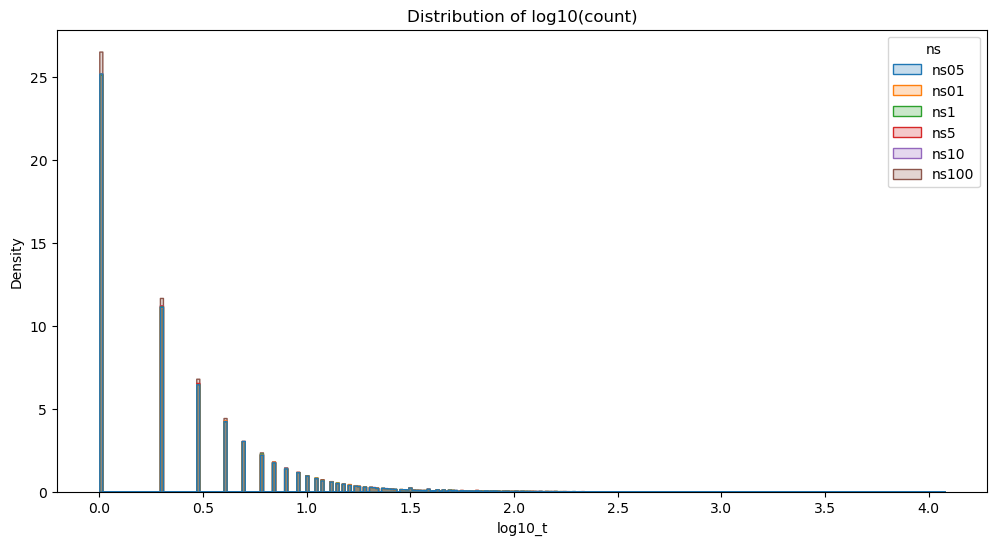

In [22]:

# Reset index to avoid duplicate labels
combined_df = combined_df.reset_index(drop=True)

# Plot the distribution of log10(count)
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='log10_t', hue='ns', element='step', stat='density', common_norm=False)
plt.xlabel('log10_t')
plt.ylabel('Density')
plt.title('Distribution of log10(count)')
plt.show()

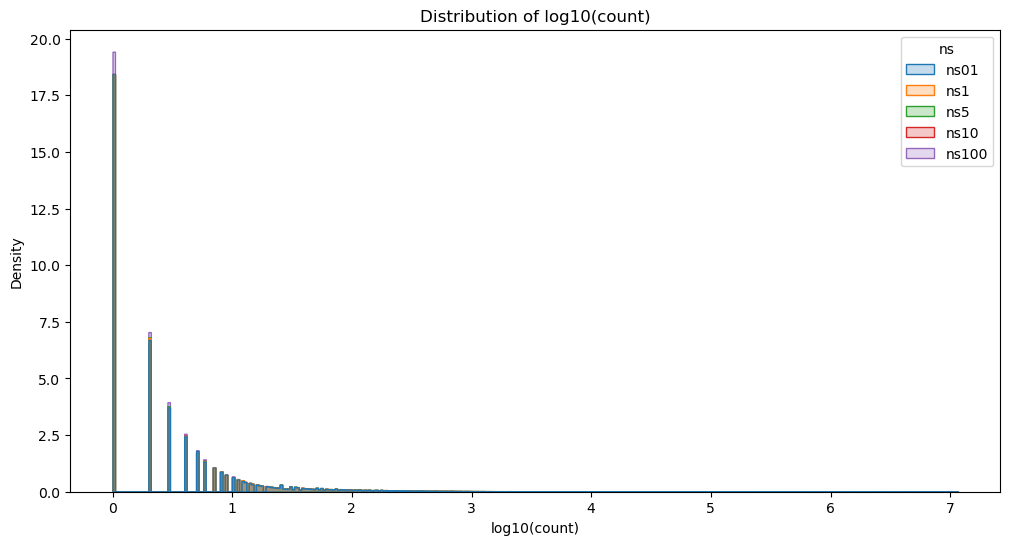

In [5]:

# Plot the distribution of log10(count)
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='log10_count', hue='ns', element='step', stat='density', common_norm=False)
plt.xlabel('log10(count)')
plt.ylabel('Density')
plt.title('Distribution of log10(count)')
plt.show()


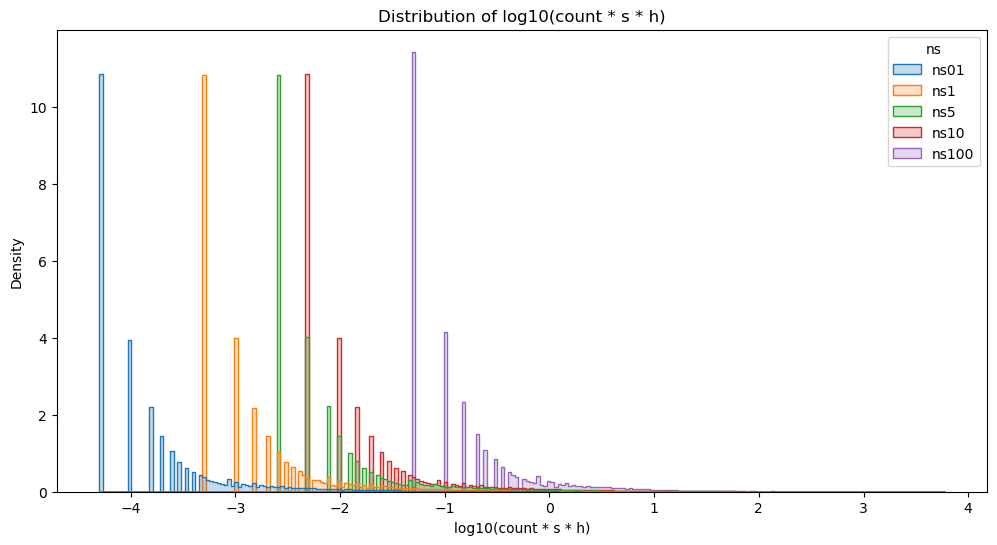

In [46]:

# Plot the distribution of log10(count*s*h)
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='log10_count_s_h', hue='ns', element='step', stat='density', common_norm=False)
plt.xlabel('log10(count * s * h)')
plt.ylabel('Density')
plt.title('Distribution of log10(count * s * h)')
plt.show()

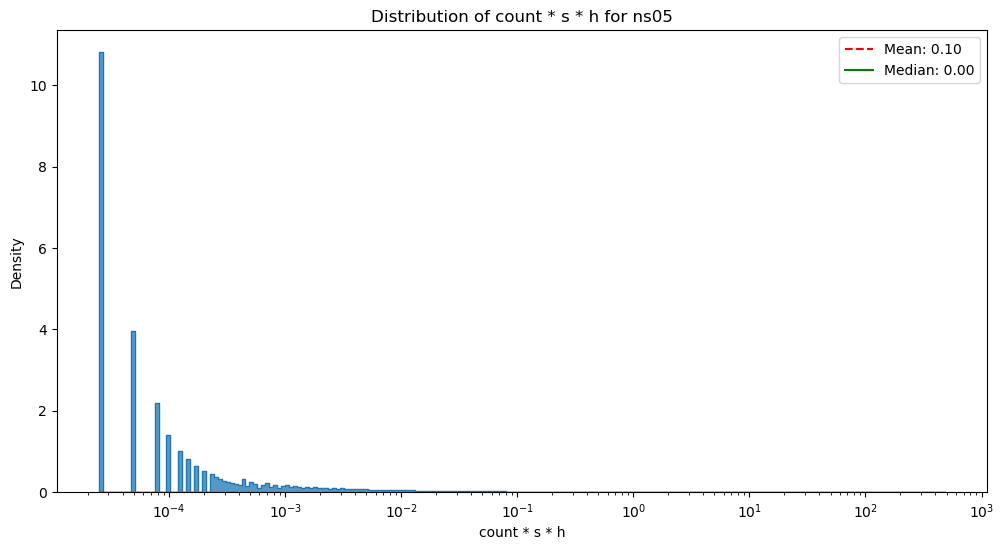

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns05'], x='count_s_h', element='step', stat='density', common_norm=False, log_scale=True)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns05')
mean_value = combined_df[combined_df['ns']=='ns05']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns05']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {(median_value):.2f}')
plt.legend()
plt.show()

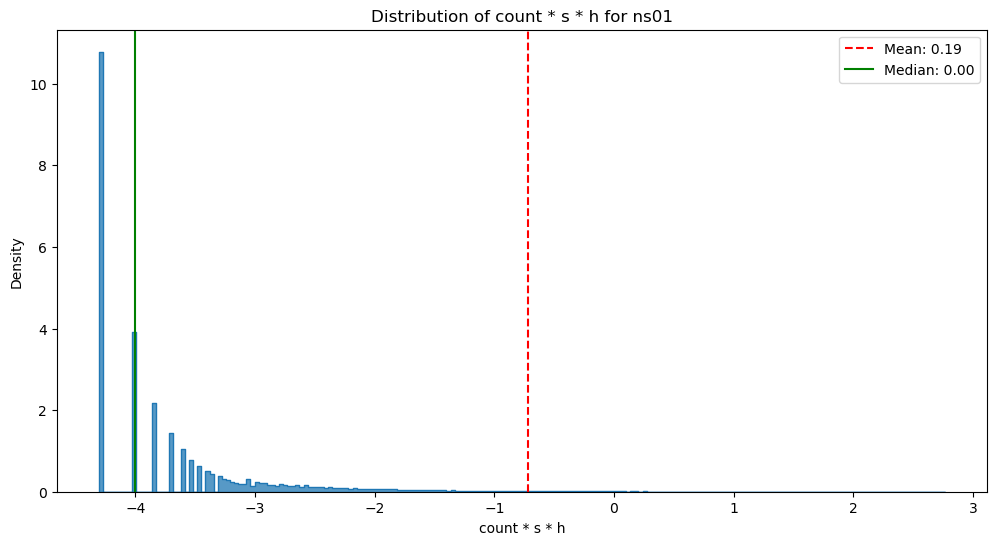

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns01'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns01')
mean_value = combined_df[combined_df['ns']=='ns01']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns01']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {(median_value):.2f}')
plt.legend()
plt.show()

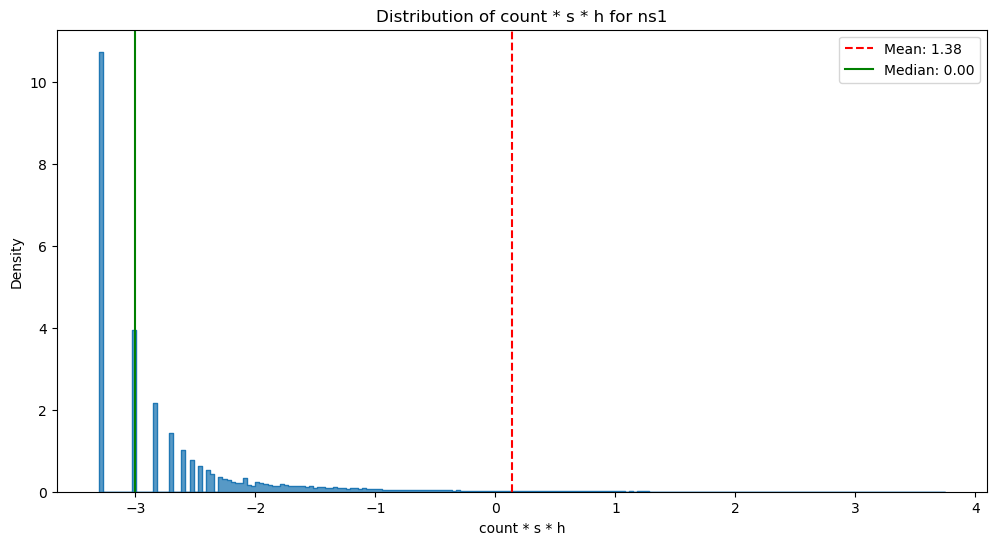

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns1'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns1')
mean_value = combined_df[combined_df['ns']=='ns1']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns1']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {(median_value):.2f}')
plt.legend()
plt.show()

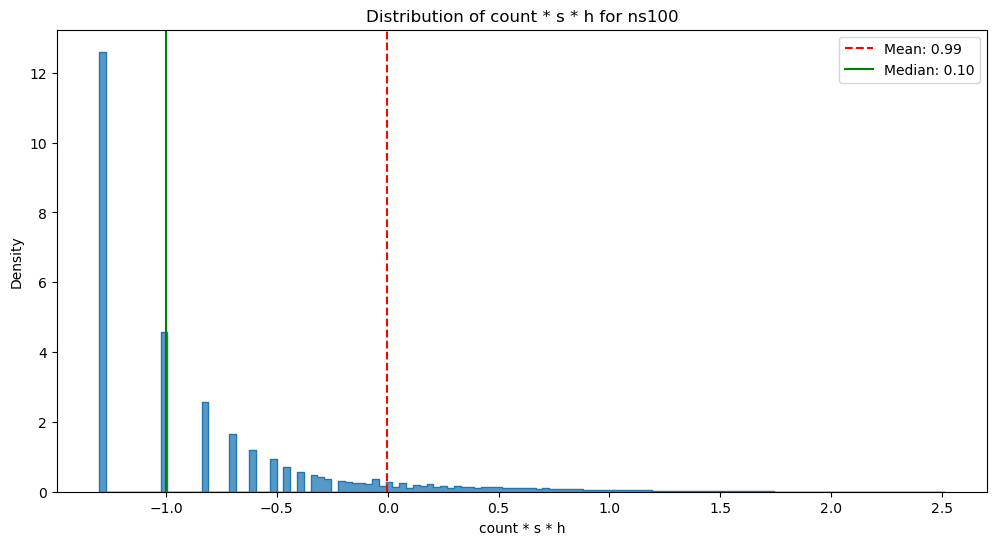

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns100'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns100')
mean_value = combined_df[combined_df['ns']=='ns100']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns100']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {(median_value):.2f}')
plt.legend()
plt.show()

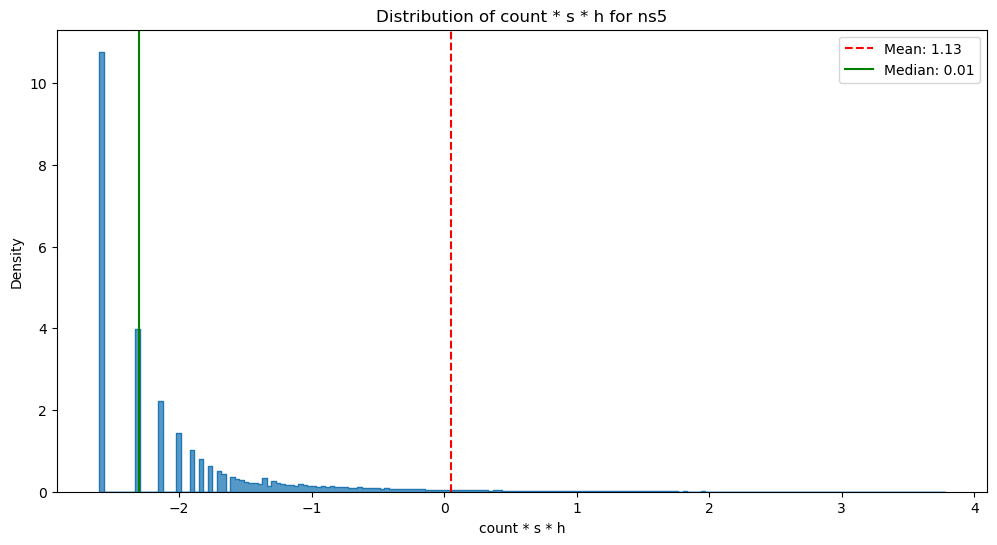

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns5'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns5')
mean_value = combined_df[combined_df['ns']=='ns5']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns5']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {(median_value):.2f}')
plt.legend()
plt.show()

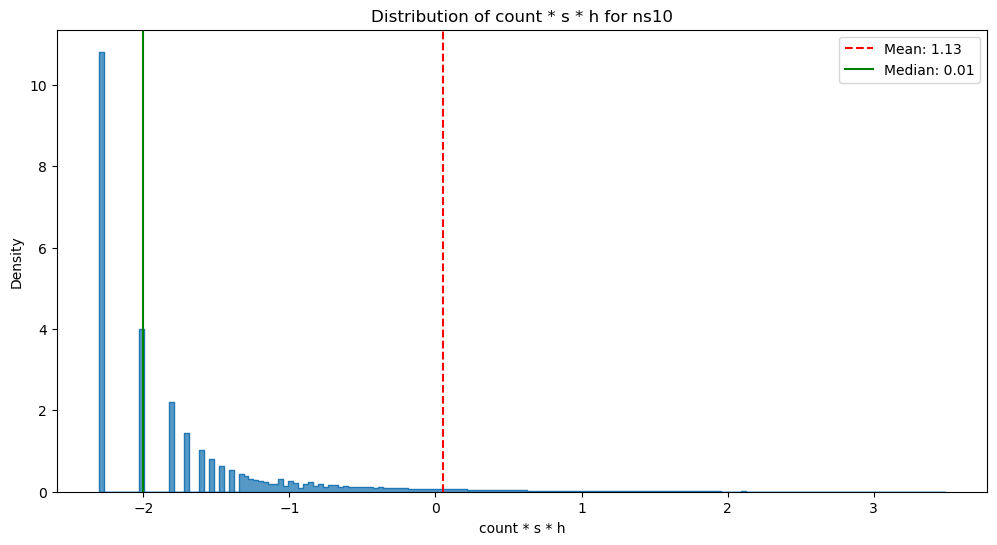

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df[combined_df['ns']=='ns10'], x='log10_count_s_h', element='step', stat='density', common_norm=False)
plt.xlabel('count * s * h')
plt.ylabel('Density')
plt.title('Distribution of count * s * h for ns10')
mean_value = combined_df[combined_df['ns']=='ns10']['count_s_h'].mean()
median_value = combined_df[combined_df['ns']=='ns10']['count_s_h'].median()

plt.axvline(np.log10(mean_value), color='r', linestyle='--', label=f'Mean: {(mean_value):.2f}')
plt.axvline(np.log10(median_value), color='g', linestyle='-', label=f'Median: {(median_value):.2f}')
plt.legend()
plt.show()